**Learner Name: Damian Najera**

# Introduction to Computer Vision: Twitter US Airline Sentiment

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [106]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib
import warnings                                         # Import warnings

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                                              # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize                         # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer                                # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS                                      # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer                    # Import count Vectorizer
from sklearn.model_selection import train_test_split                           # Import train test split
from sklearn.ensemble import RandomForestClassifier                            # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score                            # Import cross val score
from sklearn.metrics import confusion_matrix                                   # Import confusion matrix
from wordcloud import WordCloud                                                # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer                    # Import Tf-Idf vector
import nltk                                                                    # Import nltk
nltk.download('omw-1.4')

from tensorflow.keras import backend                                           # Import backend
import random                                                                  # Import random
import tensorflow as tf                                                        # Import tensorflow
from sklearn.preprocessing import LabelBinarizer                               # Import Label Binarizer
from tensorflow.keras.layers import Dropout                                    # Import Dropout

# Suppress the MarkupResemblesLocatorWarning
warnings.filterwarnings('ignore', category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Loading the dataset

In [77]:
data = pd.read_csv("Tweets.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

### Check the head and tail of the data

In [78]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [79]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Understand the shape of the dataset

In [80]:
data.shape

(14640, 15)

### Check for Duplicate Entries

In [81]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 36


Given the context of our problem and the understanding of our dataset, let us remove the duplicate entries to ensure we are working with unique tweets.

In [82]:
# Removing duplicate rows
data.drop_duplicates(inplace=True)

# Verifying that duplicates have been removed
remaining_duplicates = data.duplicated().sum()

remaining_duplicates

0

In [83]:
data.shape

(14604, 15)

### Checking for Missing Values

In [84]:
# Check for total missing values in each column
missing_values = data.isnull().sum()

# Display the columns with their respective count of missing values
missing_values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

#### Observations:
- `negativereason`: 5,445 missing values. This is expected since not every tweet will be negative, and thus won't have a reason associated with it.
- `negativereason_confidence`: 4,101 missing values. Similar to the previous point, not every tweet will have a negative reason confidence if it's not negative.
- `airline_sentiment_gold`: 14,564 missing values. This column seems to represent some gold standard for sentiment, but it's mostly missing. Given its high count of missing values, it might not be very useful for analysis or modeling.
- `negativereason_gold`: 14,572 missing values. Like airline_sentiment_gold, this column has a high number of missing values, which makes it less useful.
- `tweet_coord`: 13,589 missing values. This indicates that a large portion of tweets do not have geolocation data associated with them.
- `tweet_location`: 4,723 missing values. This suggests that many users have not specified a location in their tweets or profiles.
- `user_timezone`: 4,814 missing values. A significant number of users haven't set or provided their timezones.

## Exploratory Data Analysis

### Univariate Analysis

In [85]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top and a summary of the information.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    value_counts = data[feature].value_counts()[:n]  # Get counts for top n categories
    categories = value_counts.index.tolist()  # Get the category names
    counts = value_counts.values.tolist()  # Get the count for each category
    percentages = [100 * count / total for count in counts]  # Calculate percentages

    plt.figure(figsize=(len(categories) + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=categories
    )

    for i, p in enumerate(ax.patches):
        label = "{:.1f}%".format(percentages[i]) if perc else counts[i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

#### Percentage of tweets for each airline



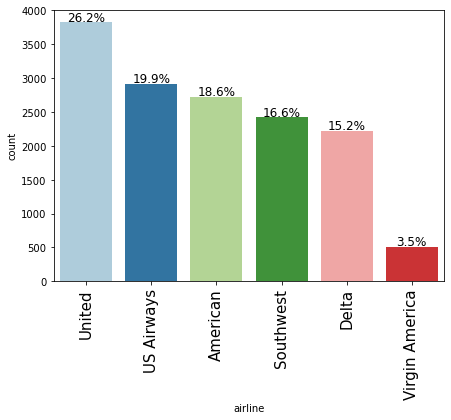

In [86]:
labeled_barplot(data, "airline", perc=True)

#### Observations:
-United has the highest percentage of tweets at approximately 26.7%, indicating that it is the most discussed airline on Twitter within this dataset.

-Virgin America has the lowest percentage of tweets at about 3.5%, suggesting that it has the least Twitter mentions among the airlines in this dataset.

-The top three airlines, United, US Airways, and American, account for over 64.8% of the tweets, showing that a significant portion of the conversation is concentrated around these airlines.

-Southwest and Delta also have a considerable share of Twitter mentions, with 16.6% and 15.2% respectively, indicating that they are also prominent in the Twitter discourse related to airlines.

#### Distribution of sentiments across all the tweets

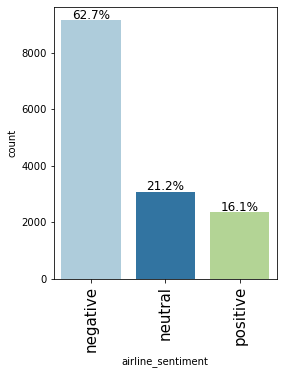

In [87]:
labeled_barplot(data, "airline_sentiment", perc=True)

#### Observations:
- The majority of the tweets, approximately 62.72%, have a negative sentiment. This is a significant portion and suggests that most of the conversations about airlines on Twitter within this dataset are complaints or expressions of dissatisfaction.

- Around 21.17% of the tweets are neutral. These could be questions, statements of fact, or tweets that do not express a clear positive or negative sentiment.

- Positive sentiments account for about 16.12% of the tweets. While this is the smallest proportion, it indicates that there is a presence of positive feedback or compliments among the tweets.

#### Plot of all the negative reasons

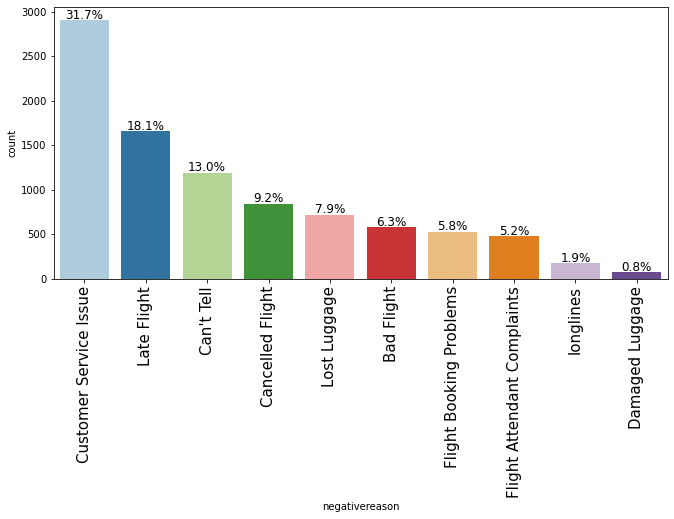

In [88]:
# Filter out the data to include only negative tweets with a specified negative reason
negative_data = data[(data['airline_sentiment'] == 'negative') & (data['negativereason'].notna())]

# Now plot the barplot with the filtered data
labeled_barplot(negative_data, "negativereason", perc=True)

#### Observations:
- The most common negative reason, accounting for approximately 31.7% of the negative tweets, is "Customer Service Issue." This indicates that customer service is a significant area where passengers feel airlines are lacking.
- "Late Flight" is the second most frequent complaint with 18.1% of the negative tweets. This suggests that timeliness is a critical factor negatively impacting passenger satisfaction.
- "Can't Tell" comes in third at about 13.0%, indicating that a considerable number of tweets express dissatisfaction without specifying a clear reason, or the reason is not easily inferred from the tweet.
- "Cancelled Flight" is the fourth most common complaint, making up 9.2% of negative tweets. This reflects the significant impact of cancellations on passenger discontent.
- "Lost Luggage" (7.9%) and "Damaged Luggage" (0.8%) together show that luggage handling is another notable area for customer grievances.
- "Bad Flight" at 6.3% and "Flight Attendant Complaints" at 5.2% suggest that the in-flight experience and interactions with the flight crew are also sources of negative feedback.
- "Flight Booking Problems" represent 5.8% of the negative reasons, while "longlines" are mentioned in 1.9% of the tweets, pointing to dissatisfaction with the booking process and check-in procedures.

### Bivariate Analysis

#### Distribution of Sentiment of tweets for each airline

<AxesSubplot:xlabel='airline'>

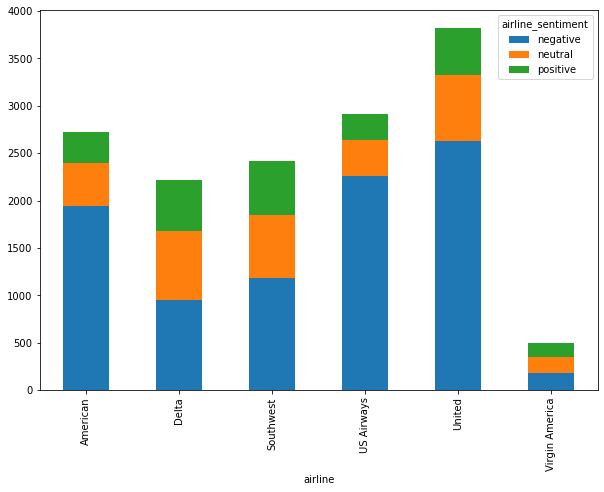

In [89]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).size().unstack()
airline_sentiment.plot(kind='bar', figsize=(10, 7), stacked=True)

#### Observations:
- United, US Airways, and American have a notably higher proportion of negative tweets compared to other sentiments.
- Southwest and Virgin America have a more balanced distribution of sentiments, with a relatively higher proportion of neutral and positive tweets.
- Delta seems to have a smaller proportion of negative tweets compared to United, US Airways, and American.
- Virgin America has the smallest overall number of tweets, which could indicate either less customer engagement on Twitter or a smaller customer base.

In general, every airline has more negative tweets than positive or neutral, with negative sentiment being the most common. However, the balance between neutral and positive varies, with some airlines having a comparable number of neutral and positive tweets, while others have more neutral than positive.

#### Wordcloud for negative tweets

In [90]:
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [91]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

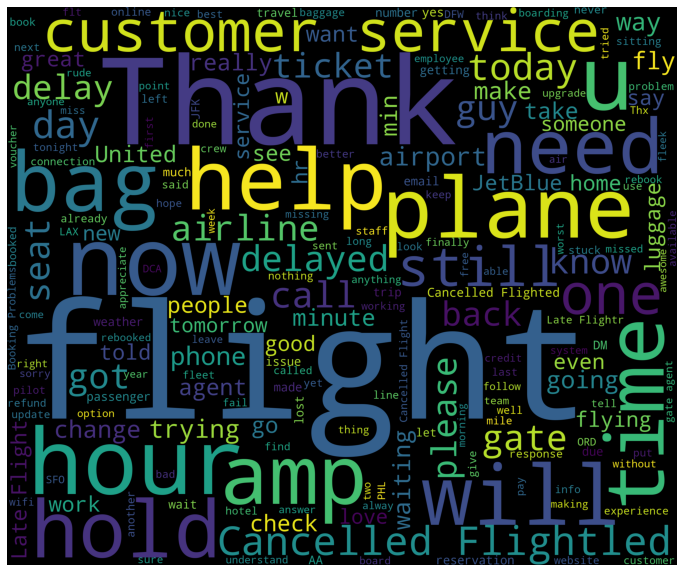

In [92]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for positive tweets

In [93]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [94]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

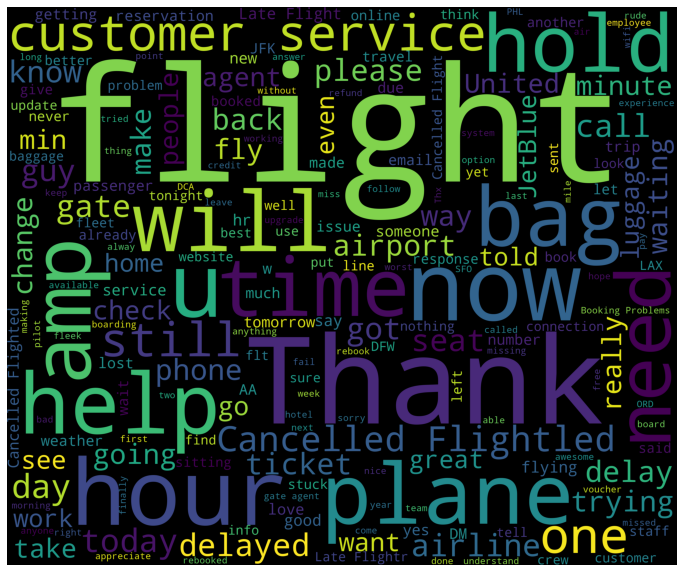

In [95]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Data Preparation for Modeling



- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

### Drop all unnecessary columns

In [96]:
# Take text and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]

In [97]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [98]:
data.shape

(14604, 2)

In [99]:
data['text'].unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [100]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

### Remove HTML Tages

In [108]:
# Code to remove the html tage
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(strip_html)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Replace contractions in string

In [110]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head() 

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Remove numbers

In [111]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)  # Replace one or more digits with nothing
    return text

data['text'] = data['text'].apply(remove_numbers)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Apply Tokenization

In [112]:
data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Length: 14604, dtype: object

In [113]:
# Complete the code to apply tokenization on text column
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# Complete the code to display the head of the data
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


### Applying lowercase and removing stopwords and punctuation

**Adding Stopwords**

In [114]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

**All the preprocessing steps in one function**

In [115]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## Model Building

### Using countvectorizer

In [116]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)
# Fit and transform the CountVectorizer on the 'text' column
data_features = Count_vec.fit_transform(data['text'])

# Convert the dataframe to array
data_features = data_features.toarray()

In [117]:
data_features.shape

(14604, 5000)

#### Create train and test sets

In [118]:
# Assign the independent variable (data_features) to X
X = data_features

# Assign the dependent variable (airline_sentiment) to y
y = data['airline_sentiment']

In [119]:
# Split data into training and testing set with 30% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Model

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = ____________(n_estimators=____, n_jobs=4)            # Initialize the Random Forest Classifier

forest = ______.____(______, _______)                         # Fit the forest variable on X_train and y_train

print(forest)

print(np.mean(_______________(forest, X, y, cv=10)))          # Calculate cross validation score

#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             # Initializing a emptry list to store the score
for b in base_ln:
    clf = _______________(n_estimators = b)                                                # Complete the code to apply Rondome Forest Classifier
    scores = ___________(_____, ______, _______, cv = 5, scoring = '___________')          # Complete the code to find the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean())                                                        # Append the scores to cv_scores list

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data .
clf = _________(n_estimators = _____________)                     # Initialize the Random Forest classifier with optimal learners
___.____(____, ___)                                               # Fit the classifer on X_train and y_train
___.____(____, ___)                                               # Find the score on X_train and y_train

#### Best Random Forest model

In [ ]:
  # Predict the result for test data using the model built above.
  result = _____.predict(_______)                                   # Complete the code to predict the X_test data using the model built above (forest)

In [ ]:
# Print and plot Confusion matirx

conf_mat = ________(___________, _________)                       # Complete the code to calculate the confusion matrix between test data and result

print(conf_mat)                                                   # Print confusion matrix

In [ ]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 40 important features from countvectorizer+Randomforest based mode

In [ ]:
all_features = Count_vec.get_feature_names()                     # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = ________(background_color="white",colormap='viridis',width=2000,height=1000).generate(_______)

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = ______________(max_features=_____)                          # Complete the code to initialize the TF-IDF vector function with max_features = 5000.
data_features = tfidf_vect.fit_transform(data['text'])                   # Fit the tf idf function on the text column

data_features = data_features._______()                                  # Complete the code to convert the datafram into array

In [ ]:
data_features.___________                                                # Complete the code to check the shape of the data features

#### Create train and test sets

In [ ]:
X = _____________                                                        # Complete the code to get the independent variable (data_features) stored as X

y = data.__________                                                      # Complete the code to get the dependent variable (airline_sentiment) stored as Y

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =_________ (__, __, test_size=___, random_state=____)   # Complete the code to split the X and Y into train and test dat

#### Random Forest Model

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = ____________(n_estimators=____, n_jobs=4)            # Initialize the Random Forest Classifier

forest = ______.____(______, _______)                         # Fit the forest variable on X_train and y_train

print(forest)

print(np.mean(_______________(forest, X, y, cv=10)))          # Calculate cross validation score

#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             # Initializing a emptry list to store the score
for b in base_ln:
    clf = _______________(n_estimators = b)                                                # Complete the code to apply Rondome Forest Classifier
    scores = ___________(_____, ______, _______, cv = 5, scoring = '___________')          # Complete the code to find the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean())                                                        # Append the scores to cv_scores list

In [ ]:
# Plot the misclassification error for each of estimators (Hint: Use the above code which is used while plotting the miscalssification error for CountVector function )

In [ ]:
# Train the best model and calculating accuracy on test data .
clf = _________(n_estimators = _____________)                     # Initialize the Random Forest classifier with optimal learners
___.____(____, ___)                                               # Fit the classifer on X_train and y_train
___.____(____, ___)                                               # Find the score on X_train and y_train

In [ ]:
# Predict the result for test data using the model built above.
result = _____.predict(_______)                                   # Complete the code to predict the X_test data using the model built above (forest)

In [ ]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, result)                      # Complete the code to calculate the confusion matrix between test data and restust


df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(_______, annot=True, fmt='g')                         # Complete the code to plot the heatmap of the confusion matrix

#### Wordcloud of top 20 important features from TF-IDF+Randomforest based mode

In [ ]:
all_features = tfidf_vect.get_feature_names_out()          #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = ________(background_color="white",colormap='viridis',width=2000,height=1000).generate(_______)

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using LSTM

In [ ]:
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#### Tokenizing the text column

In [ ]:
# Complete the code with by having 800 vocab size
tokenizer = Tokenizer(num_words = ____, split = ' ')

# Complete the code to fit tokenizer on text data
tokenizer.fit_on_texts(data['____'].values)

# Converting text to sequences
X = tokenizer.texts_to_sequences(data['text'].values)

# Padding the sequences
X = pad_sequences(X)

#### Encoding the target variable

In [ ]:
# Storing the Label Binarizer
enc = LabelBinarizer()
# Fitting the Label Binarizer on airline_sentiment
y_encoded = enc.fit_transform(data['airline_sentiment'])

#### Split the data into train and test

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.30, random_state = 42)

#### Training LSTM Model

In [ ]:
# Initializing the model
model = Sequential()

# Adding the embedding layer with 800 vocabularies, 120 neurons
model.add(Embedding(___, ____, input_length = X.shape[1]))

# Complete the code to add the LSTM layer with 256 neurons
model.add(LSTM(___,return_sequences=True))

# Complete the code to add the LSTM layer with 150 neurons and dropout_rate= 0.2
model.add(LSTM(___, dropout = ___, recurrent_dropout = 0.2))

# Complete the code to add the dense layer with 124 neurons and relu activation function
model.add(Dense(___,activation = '___'))

# Complete the code to add dropout with dropout_rate= 0.2
model.add(Dropout(____))

# Complete the code to add a dense layer with 64 neurons and relu activation function
model.add(Dense(___,activation = '___'))

# Complete to the code to add the output layer with 3 neurons and softmax activation function
model.add(Dense(___, activation = '___'))

# Complete the code to compile the model with categorical_crossentropy as loss function, accuracy as metrics and adam as optimizer
model.compile(loss = '______', optimizer = '_____', metrics = ['_____'])

In [ ]:
# Summary of the model
print(model.summary())

In [ ]:
%%time
# Complete the code to fit the model on X_train and y_train with epochs as 30, batch size as 32
his = model.fit(X_train, y_train, epochs = ___, batch_size = ___, verbose = 'auto')

In [ ]:
# Predicting on X_test using the above model
result = model.predict(X_test)

In [ ]:
# Applying argmax function on the predicted values (result) to get the predicted labels
y_pred_arg=np.argmax(result,axis=1)
# Applying argmax function on the y_test to get back the predicted labels
y_test_arg=np.argmax(y_test,axis=1)

**Plotting the confusion matrix**

In [ ]:
conf_mat = confusion_matrix(y_test_arg, y_pred_arg)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Summary



-


## Happy Learning!
---